<a href="https://colab.research.google.com/github/arasukumar2/Data-science-/blob/main/pjt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import files
uploaded = files.upload()

Saving IT_customer_churn.csv to IT_customer_churn.csv


Dataset Head:
    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Ye

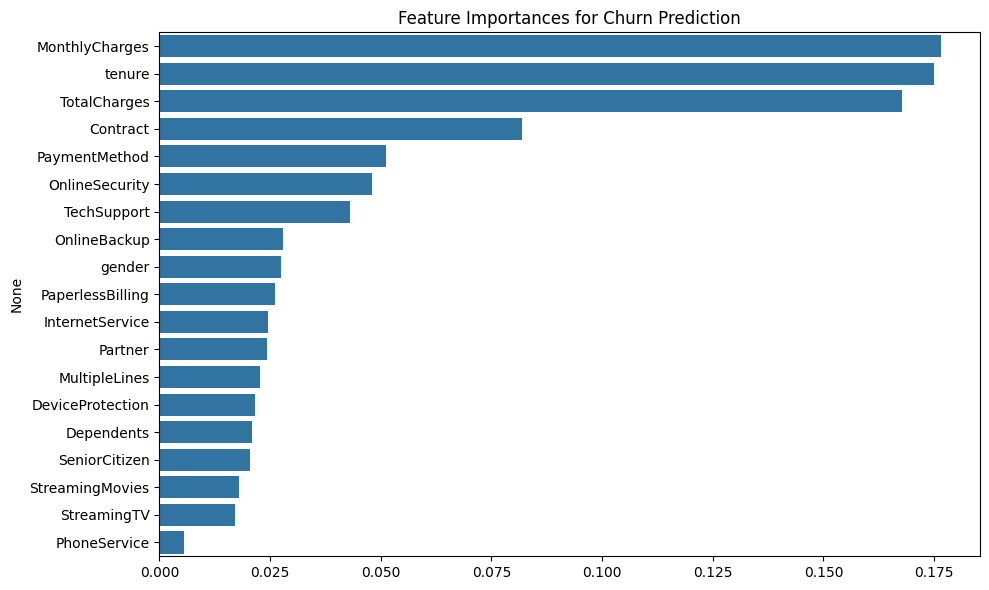

In [9]:
# Predicting Customer Churn Using Machine Learning to Uncover Hidden Patterns

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Step 2: Load Dataset
# Update the file path to the correct location in your Google Drive
# Assuming the file is in 'MyDrive', the path would be:
file_path = '/content/drive/MyDrive/IT_customer_churn.csv'
#If it's in a subfolder, include the subfolder in the path. Example: '/content/drive/MyDrive/data/IT_customer_churn.csv'
df = pd.read_csv(file_path)
# Step 3: Quick Overview
print("Dataset Head:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
# Step 4: Handle Missing Values
df.dropna(inplace=True)
# Step 5: Encode Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 6: Define Features and Target
# Try to identify churn column automatically
target_col = [col for col in df.columns if 'churn' in col.lower()][0]
X = df.drop(target_col, axis=1)
y = df[target_col]

# Step 7: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Evaluate Model
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 11: Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances for Churn Prediction")
plt.tight_layout()
plt.show()